### HW4 for Fixed-income Quantitative Trading
** Xingyue Huang (N14034682) **

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels .api as sm
%matplotlib inline

In [8]:
df = pd.read_excel('CMT-all.xlsx')
df = df.set_index('Date')
df = df.loc['2007-01-01':,:] # select data from 2007 on
df = df.dropna() # remove nan
print df.head(), '\n' # print first five rows of data

def alpha(t,l):
    return ((1-np.exp(-l*t))/(l*t))

# variable initialization
lam = 0.0609
term = [1, 3, 6, 12, 24, 36, 60, 84, 120, 240, 360]
b2 = [alpha(t,lam) for t in term]
b3 = [alpha(t,lam)-np.exp(-lam*t) for t in term]

beta_1, beta_2, beta_3 = [], [], [] # store betas with lists
x = np.array([b2+b3]).reshape(2,-1).T # define x variables
x = sm.add_constant(x)

'''Step 1: Assume a value of lambda, and beta1; beta2; beta3 
to a set of yields observed on day t (repeat for all days in the dataset)'''

for t in df.index:
    result = sm.OLS(df.loc[t],x).fit()
    beta_1.append(result.params[0])
    beta_2.append(result.params[1])
    beta_3.append(result.params[2])

mean_beta1 = np.mean(np.nan_to_num(np.array(beta_1)))
mean_beta2 = np.mean(np.nan_to_num(np.array(beta_2)))
mean_beta3 = np.mean(np.nan_to_num(np.array(beta_3)))
std_beta1 = np.std(np.nan_to_num(np.array(beta_1)))
std_beta2 = np.std(np.nan_to_num(np.array(beta_2)))
std_beta3 = np.std(np.nan_to_num(np.array(beta_3)))

# print estimation of betas
print 'beta_1 estimation:'
print 'mean of beta1:', mean_beta1
print 'standard deviation of beta1:', std_beta1, '\n'
print 'beta_2 estimation:'
print 'mean of beta2:', mean_beta2
print 'standard deviation of beta2:', std_beta2, '\n'
print 'beta_3 estimation:'
print 'mean of beta3:', mean_beta3
print 'standard deviation of beta3:', std_beta3, '\n'

              1M    3M    6M    1Y    2Y    3Y    5Y    7Y   10Y   20Y   30Y
Date                                                                        
2007-01-02  4.79  5.07  5.11  5.00  4.80  4.71  4.68  4.68  4.68  4.87  4.79
2007-01-03  4.84  5.05  5.09  4.98  4.76  4.69  4.66  4.66  4.67  4.85  4.77
2007-01-04  4.80  5.04  5.07  4.95  4.71  4.63  4.61  4.61  4.62  4.81  4.72
2007-01-05  4.81  5.05  5.09  4.98  4.76  4.68  4.65  4.65  4.65  4.84  4.74
2007-01-08  4.87  5.08  5.13  5.01  4.78  4.70  4.66  4.66  4.66  4.84  4.74 

beta_1 estimation:
mean of beta1: 3.87002350279
standard deviation of beta1: 0.888368703133 

beta_2 estimation:
mean of beta2: -3.09014381483
standard deviation of beta2: 1.26132219186 

beta_3 estimation:
mean of beta3: -4.11867861251
standard deviation of beta3: 1.77844823496 



In [15]:
'''Step 2: Find lambda that bests the whole dataset 
(Step1 needs to be repeated on each iteration; as you search for optimal). 
You can use an optimization package, or write your own code - be creative. '''

lamda = np.linspace(0.1, 0.5, 50)
for lam in lamda:
    b2 = [alpha(t,lam) for t in term]
    b3 = [alpha(t,lam)-np.exp(-lam*t) for t in term]
    x = np.array([b2+b3]).reshape(2,-1).T # define the x variables
    x = sm.add_constant(x)
    for t in df.index:
        result = sm.OLS(df.loc[t],x).fit()
print result.params

const    2.438758
x1      -0.737472
x2      -6.658515
dtype: float64


First three components of key rates: 
[[ 0.36224396 -0.26367812 -0.35395192]
 [ 0.36770121 -0.25535738 -0.27531162]
 [ 0.37472499 -0.24508654 -0.14809894]
 [ 0.36343166 -0.21169085  0.00323176]
 [ 0.33362737 -0.10199542  0.27127487]
 [ 0.31421426  0.00776158  0.43259416]
 [ 0.28003202  0.19902898  0.41896412]
 [ 0.24760486  0.31663029  0.27944863]
 [ 0.22108623  0.39624248 -0.02039525]
 [ 0.19376543  0.50419082 -0.3142216 ]
 [ 0.15775187  0.44591363 -0.40432215]] 



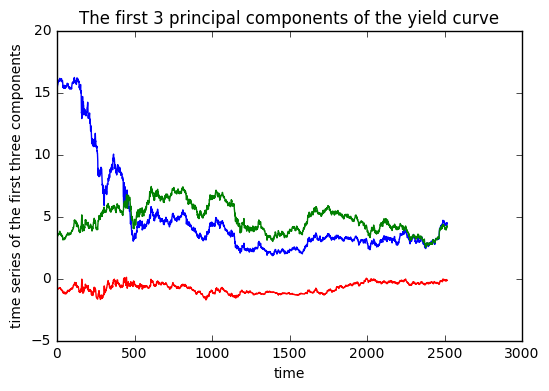

In [11]:
# construct PCAs from the levels of yields.
cov = df.cov()
eig_val_cov, eig_vec_cov = np.linalg.eig(cov) # calculate eigenvalues and eigenvectors of cov_1
for ev in eig_vec_cov: # assert the correctness of calculation
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev)) # make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]
eig_pairs.sort(key=lambda x: x[0], reverse=True) # sort the (eigenvalue, eigenvector) tuples from high to low

matrix_w = np.hstack((eig_pairs[0][1].reshape(11,1), eig_pairs[1][1].reshape(11,1), eig_pairs[2][1].reshape(11,1)))
print 'First three components of key rates: \n', matrix_w, '\n'

# plot time series of the first 3 principal components
ts_3c = np.dot(df.values, matrix_w)
plt.plot(ts_3c)
plt.xlabel('time')
plt.ylabel('time series of the first three components')
plt.title('The first 3 principal components of the yield curve')
plt.show()